# DS 303 Assignment 1
## Rohan Rajesh Kalbag
### 20D170033

#### Honour Code


I hereby declare that I have not indulged in any academic malpractices such as plagiarism and would like to assure you that, any code written in this is written by me alone. I would like to add that any resources/threads found on online sites will be mentioned in the document that was used for reference.


In [1]:
#Importing all libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
#Reading from CSV file
l = pd.read_csv("restaurent.csv").sample(50,random_state=0)
#Sampling 50 entries randomly from the csv file
l.reset_index(drop=True, inplace=True)
print(len(l))
l.head()

50


,food,decor,service,price
0,21.0,6.0,13.0,11.0
1,17.0,14.0,18.0,20.0
2,18.0,17.0,18.0,34.0
3,21.0,12.0,19.0,29.0
4,19.0,18.0,18.0,38.0


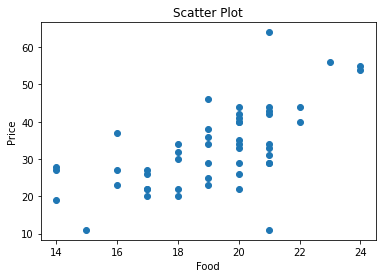

In [3]:
#Plotting scatter plot between food and price
plt.scatter(l['food'],l['price'])
plt.title("Scatter Plot")
plt.xlabel("Food")
plt.ylabel("Price")
plt.show()

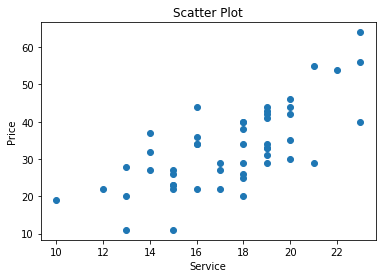

In [4]:
#Plotting scatter plot between service and price
plt.scatter(l['service'],l['price'])
plt.title("Scatter Plot")
plt.xlabel("Service")
plt.ylabel("Price")
plt.show()

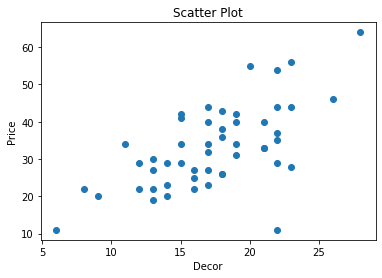

In [5]:
#Plotting scatter plot between decor and price
plt.scatter(l['decor'],l['price'])
plt.title("Scatter Plot")
plt.xlabel("Decor")
plt.ylabel("Price")
plt.show()

In [6]:
#Training dataset
X_train = l[['food','decor','service']]
y_train = l['price']

In [7]:
#Using the sklearn Linear Regression Model for Multivariate Linear Regression
model = LinearRegression()
#Fitting the model with the train data
model.fit(X_train,y_train)

LinearRegression()

In [8]:
# Prediction using the model for the input of (125, 148, 265) 
prediction = model.predict(pd.DataFrame({'food':[125],'decor':[148],'service':[265]}))

In [9]:
#The value of the coefficients obtained after Linear Regression
print(model.coef_)
print(model.intercept_)

[1.94924081 1.1483583  0.64848772]
-35.48664548890774


In [10]:
#Standard deviation with degrees of freedom n-2 to obtain 95% confidence interval
stdev = np.sqrt(sum((model.predict(X_train) - y_train)**2) / (len(y_train) - 2))

In [11]:
print(stdev)

6.3424856161582355


In [12]:
#Evaluating the confidence interval
confidence_interval = (prediction[0]-stdev*1.96, prediction[0]+stdev*1.96)
print(confidence_interval)

(537.5434577045294, 562.4060013198696)


In [13]:
#Single variable linear regression for Food and Price
model2 = LinearRegression()
X_train, y_train = np.array(l['food']).reshape(-1,1), np.array(l['price']).reshape(-1,1)
model2.fit(X_train,y_train)
#Printing the coefficient and the y intercept for the regression model
print(model2.coef_)
print(model2.intercept_)

[[2.94709454]]
[-23.40633131]


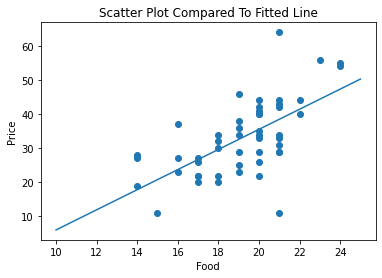

In [14]:
x = np.linspace(10,25,100)
y = model2.coef_[0]*x + model2.intercept_
plt.plot(x,y)
# Comparision of the scatter plot and single variable linear regression
plt.scatter(l['food'],l['price'])
plt.title("Scatter Plot Compared To Fitted Line")
plt.xlabel("Food")
plt.ylabel("Price")
plt.plot()
plt.show()

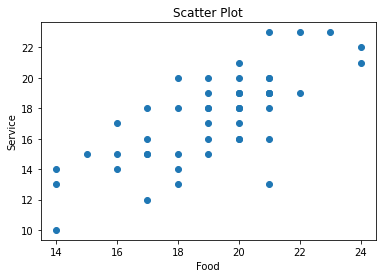

In [15]:
#Plotting scatter plot between food and service
plt.scatter(l['food'],l['service'])
plt.title("Scatter Plot")
plt.xlabel("Food")
plt.ylabel("Service")
plt.show()

In [16]:
model.predict(pd.DataFrame({'food':[20],'decor':[3],'service':[17]}))

array([17.96753688])